# Modelo Lee Carter
Predicción de tasas de mortalidad en México

Importando librerias

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

Importando los datos de tasas de mortalidad de 1960 a 2010

In [310]:
df=pd.read_csv('Fem.csv')
df.head()

,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,...,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,0.091400,0.088266,0.085557,0.083235,0.081292,0.079547,0.078030,0.076774,0.075407,0.073853,...,0.016616,0.015967,0.015345,0.014505,0.013715,0.013111,0.012761,0.012624,0.012409,0.012076
1,0.025797,0.024322,0.023111,0.021815,0.020676,0.019546,0.018386,0.017566,0.016952,0.016416,...,0.001097,0.001074,0.001047,0.001018,0.000929,0.000863,0.000845,0.000822,0.000800,0.000779
2,0.013181,0.012465,0.011856,0.011258,0.010691,0.010113,0.009539,0.009129,0.008840,0.008602,...,0.000640,0.000632,0.000625,0.000617,0.000582,0.000552,0.000542,0.000532,0.000522,0.000512
3,0.008097,0.007702,0.007349,0.007041,0.006716,0.006378,0.006053,0.005814,0.005656,0.005533,...,0.000467,0.000464,0.000461,0.000460,0.000443,0.000425,0.000419,0.000414,0.000408,0.000402
4,0.005485,0.005250,0.005029,0.004863,0.004664,0.004449,0.004250,0.004102,0.004009,0.003941,...,0.000377,0.000375,0.000375,0.000376,0.000368,0.000357,0.000352,0.000350,0.000346,0.000341


Algunas definiciones sobre periodos

In [311]:
edades=df.shape[0]
tiempo=df.shape[1]
anioini=1960
aniobase=2010
horizonte=91+49
aniofin=aniobase+horizonte
tiempotot=tiempo+horizonte

Obteniendo datos

In [312]:
df.iloc[:,0:tiempo]

,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,...,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,0.091400,0.088266,0.085557,0.083235,0.081292,0.079547,0.078030,0.076774,0.075407,0.073853,...,0.016616,0.015967,0.015345,0.014505,0.013715,0.013111,0.012761,0.012624,0.012409,0.012076
1,0.025797,0.024322,0.023111,0.021815,0.020676,0.019546,0.018386,0.017566,0.016952,0.016416,...,0.001097,0.001074,0.001047,0.001018,0.000929,0.000863,0.000845,0.000822,0.000800,0.000779
2,0.013181,0.012465,0.011856,0.011258,0.010691,0.010113,0.009539,0.009129,0.008840,0.008602,...,0.000640,0.000632,0.000625,0.000617,0.000582,0.000552,0.000542,0.000532,0.000522,0.000512
3,0.008097,0.007702,0.007349,0.007041,0.006716,0.006378,0.006053,0.005814,0.005656,0.005533,...,0.000467,0.000464,0.000461,0.000460,0.000443,0.000425,0.000419,0.000414,0.000408,0.000402
4,0.005485,0.005250,0.005029,0.004863,0.004664,0.004449,0.004250,0.004102,0.004009,0.003941,...,0.000377,0.000375,0.000375,0.000376,0.000368,0.000357,0.000352,0.000350,0.000346,0.000341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.531915,0.528302,0.534483,0.531250,0.536232,0.533333,0.530864,0.528736,0.526316,0.524272,...,0.473515,0.477134,0.478832,0.481066,0.484480,0.485640,0.486076,0.486453,0.486128,0.485680
104,0.576923,0.571429,0.580645,0.571429,0.578947,0.575000,0.581395,0.583333,0.568627,0.566038,...,0.526316,0.527704,0.531328,0.532530,0.534884,0.535714,0.536638,0.537500,0.538934,0.537223
105,0.642857,0.666667,0.647059,0.631579,0.650000,0.619048,0.652174,0.640000,0.629630,0.620690,...,0.582915,0.583732,0.589041,0.590308,0.593220,0.595142,0.593023,0.594096,0.597070,0.594203
106,0.750000,0.666667,0.714286,0.714286,0.666667,0.700000,0.727273,0.666667,0.692308,0.714286,...,0.644231,0.654206,0.655172,0.658120,0.658537,0.658730,0.656934,0.659722,0.662069,0.657534


Visualización de la información, las tasas de mortalidad regularmente se exploran en escala logaritmica

No handles with labels found to put in legend.


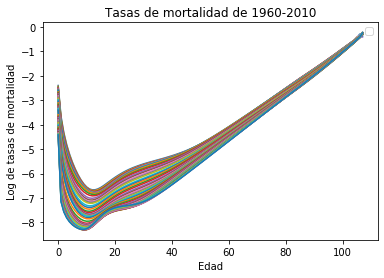

In [336]:
plt.plot(np.log(df))

plt.xlabel('Edad')
plt.ylabel('Log de tasas de mortalidad')
plt.title('Tasas de mortalidad de 1960-2010')
plt.legend()
plt.show()

## 1.Modelo Lee Carter para proyección de tasas de mortalidad

In [314]:
lm=np.log(df.iloc[:,0:tiempo]).to_numpy()
ax=np.mean(lm,axis=1)
r=np.transpose(np.tile(ax,(tiempo,1)))
lm_a=lm-r
u, s, v = np.linalg.svd(lm_a, full_matrices=True)
d = np.diag(s)
kt=d.dot(-v)
kt=kt[0,:]
bx=-u[:,0]



Dividiendo datos en entrenamiento y prueba

In [366]:
x_kt=np.arange(kt.shape[0]).reshape((-1, 1))
# proporcion de entrenamiento
e=0.85
particion=int(kt.shape[0]*e)
x_kt_train, x_kt_test = x_kt[0:particion], x_kt[particion:]
kt_train, kt_test = kt[0:particion], kt[particion:]


Para la proyección de tasas, se requieren predicciones sobre el factor kt

## 1.1 Ajuste con regresión lineal

Test RMSE: 1.887
Train RMSE: 0.509


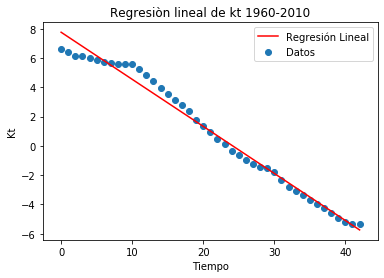

In [377]:
from sklearn.linear_model import LinearRegression

modeloRL = LinearRegression()
modeloRL.fit(x_kt_train,kt_train)
y_pred_RL = modeloRL.predict(x_kt_train)

plt.plot(x_kt_train,y_pred_RL,color='red', label='Regresión Lineal')
plt.scatter(x_kt_train,kt_train, label='Datos')

#plt.plot(x_kt,y_pred_RL,color='red')
#plt.scatter(x_kt,kt)

#print(modeloRL.intercept_)
#print(modeloRL.coef_[0])
modelRL.score(x_kt,kt)
yt_pred_RL = modeloRL.predict(x_kt_test)
rmset = sqrt(mean_squared_error(kt_test, yt_pred_RL))
rmser = sqrt(mean_squared_error(kt_train, y_pred_RL))
print('Test RMSE: %.3f' % rmset)
print('Train RMSE: %.3f' % rmser)
plt.xlabel('Tiempo')
plt.ylabel('Kt')
plt.title('Regresiòn lineal de kt 1960-2010')
plt.legend()
plt.show()

## 1.2 Ajuste con Serie de Tiempo ARIMA

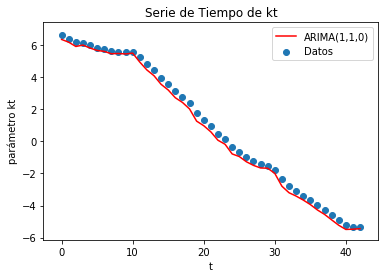

Test TSRMSE: 0.878
Train TSRMSE: 0.299


In [388]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from pandas import DataFrame


modelTS=ARIMA(kt_train,order=(1,1,0))
model_fit=modelTS.fit(disp=1)
yTSpred=model_fit.predict(start=1,end=particion,typ = 'levels')

plt.plot(x_kt_train,yTSpred,color='red',label='ARIMA(1,1,0)')
plt.scatter(x_kt_train,kt_train,label='Datos')
plt.xlabel('t')
plt.ylabel('parámetro kt')
plt.title('Serie de Tiempo de kt')
plt.legend()
plt.show()

ytTSpred=model_fit.predict(start=particion,end=kt.shape[0]-1,typ = 'levels')
TSRMSEt = sqrt(mean_squared_error(kt_test, ytTSpred))
TSRMSEr = sqrt(mean_squared_error(kt_train, yTSpred))

print('Test TSRMSE: %.3f' % TSRMSEt)
print('Train TSRMSE: %.3f' % TSRMSEr)


## 1.3 Ajuste con Maquinas de Soporte Vectorial p/regresión

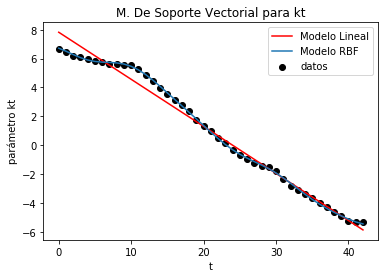

Test linRMSE: 2.020
Test rbfRMSE: 1.474
Train linRMSE: 0.513
Train rbfRMSE: 0.081


In [380]:
from sklearn.svm import SVR

Modsvr_lin = SVR(kernel='linear', C=1e3)
Modsvr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.01)

Modsvr_lin.fit(x_kt_train,kt_train)
Modsvr_rbf.fit(x_kt_train,kt_train)

y_lin = Modsvr_lin.predict(x_kt_train)
y_rbf = Modsvr_rbf.predict(x_kt_train)

plt.scatter(x_kt_train, kt_train, c='k', label='datos')
plt.plot(x_kt_train, y_lin, c='r', label='Modelo Lineal')
plt.plot(x_kt_train, y_rbf, label='Modelo RBF ')

plt.xlabel('t')
plt.ylabel('parámetro kt')
plt.title('M. De Soporte Vectorial para kt')
plt.legend()
plt.show()

Modsvr_lin.score(x_kt,kt)
Modsvr_rbf.score(x_kt,kt)

yt_pred_lin = Modsvr_lin.predict(x_kt_test)
yt_pred_rbf = Modsvr_rbf.predict(x_kt_test)
rmselin = sqrt(mean_squared_error(kt_test, yt_pred_lin))
rmserbf = sqrt(mean_squared_error(kt_test, yt_pred_rbf))

rmselinr = sqrt(mean_squared_error(kt_train, y_lin))
rmserbfr = sqrt(mean_squared_error(kt_train, y_rbf))



print('Test linRMSE: %.3f' % rmselin)
print('Test rbfRMSE: %.3f' % rmserbf)

print('Train linRMSE: %.3f' % rmselinr)
print('Train rbfRMSE: %.3f' % rmserbfr)


## 1.4 K vecinos mas cercanos para regresión

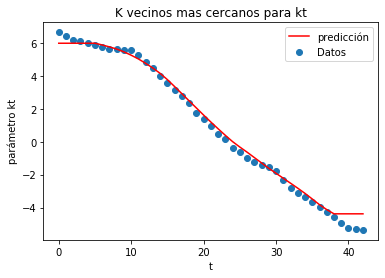

Test RMSE: 1.075
Train RMSE: 0.343


In [381]:
from sklearn import neighbors

#for i, weights in enumerate(['uniform']):
modeloknn=neighbors.KNeighborsRegressor(n_neighbors=10) # Definimos al regresor
modeloknn=modeloknn.fit(x_kt_train,kt_train)
y_prKn = modeloknn.predict(x_kt_train) # Lo entrenamos
    
    # Graficamos los resultados
    
plt.scatter(x_kt_train, kt_train,  label='Datos')
plt.plot(x_kt_train, y_prKn,color='r',label='predicción')

plt.xlabel('t')
plt.ylabel('parámetro kt')
plt.title('K vecinos mas cercanos para kt')
plt.legend()
plt.show()

modeloknn.score(x_kt,kt)
yt_prKn = modeloknn.predict(x_kt_test)
rmse = sqrt(mean_squared_error(kt_test, yt_prKn))
rmser = sqrt(mean_squared_error(kt_train, y_prKn))
print('Test RMSE: %.3f' % rmse)
print('Train RMSE: %.3f' % rmser)

## 2. Proyeccion del parámetro kt

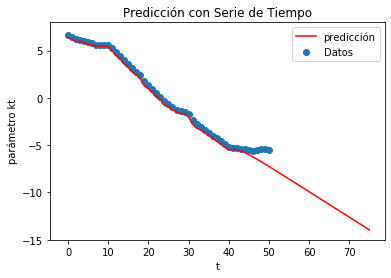

In [389]:
#años a proyectar
na=25

fin=kt.shape[0]+na
Px_kt=np.arange(0,fin).reshape((-1, 1))
# proporcion de entrenamiento

Pkt=model_fit.predict(start=1,end=fin,typ = 'levels')
plt.plot(Px_kt, Pkt, c='r', label='predicción')
plt.scatter(x_kt, kt,  label='Datos')

plt.xlabel('t')
plt.ylabel('parámetro kt')
plt.title('Predicción con Serie de Tiempo')
plt.legend()
plt.show()


In [372]:
temp=np.matrix(bx).T
temp0=np.matrix(Pkt)
rp=np.transpose(np.tile(ax,(fin,1)))
Pmx=np.exp(np.matrix(rp)+temp.dot(temp0))


qx=np.ones((Pmx.shape[0],Pmx.shape[1]))
for i in range(Pmx.shape[0]-1):
    qx[i,]=Pmx[i,]/(1+0.5*Pmx[i,])
       

No handles with labels found to put in legend.


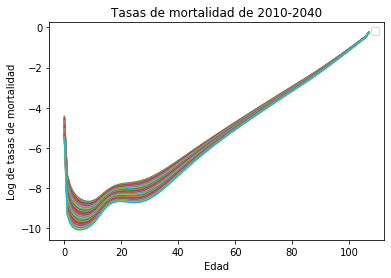

In [373]:
inicioproy=df.shape[1]
#plt.plot(np.log(mxproy))
#mxproy=mx[:,mx.shape[0]:fin]
#plt.plot(np.log(Pmx))
prmx=Pmx[:,inicioproy:fin]
plt.plot(np.log(prmx))
plt.xlabel('Edad')
plt.ylabel('Log de tasas de mortalidad')
plt.title('Tasas de mortalidad de 2010-2040')
plt.legend()
plt.show()

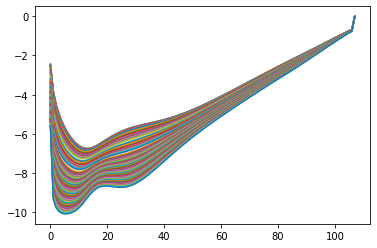

In [374]:
plt.plot(np.log(qx))